# Magnetic Domains Hard Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

In [2]:
filename = 'MD/E1/450F1/0.png'

In [3]:
def to_binary(img, lower, upper):
    """This functions converts gray-scaled images to Binary by binning the gray pixel values."""
    return (lower < img) & (img < upper)

In [4]:
def getm(filename, background = 0, pics = True, low = 0, high = 1, i = 0, z =10000):
    """This function takes in a .png, crops the image, converts to binary, and obtains a magntization values"""
    
    img = plt.imread(filename)[i:i+z,i:i+z] #Reads file and crops it. 1536x2048 images
    img1 = rgb2gray(img) #converts the RGB image to Gray
    
    # Below is'nt really background subtraction but, makes finding the low argument
    #for the binary function easy
    if background !=0:
        bimg = plt.imread(background)[i:i+z,i:i+z]
        bimg1 = rgb2gray(bimg) 
        img2 = to_binary(img1 - bimg1,low,high) #Shifts original grayscale downwards then converts to binary
    else:
        img2 = to_binary(img1,low,high) #Converts to binary
    
    Light = np.sum(img2) #calculates the Light area as the sum of the binary images
    Dark = np.size(img2) - Light
    m =(Dark-Light)/(Dark+Light) # Is the magnetization value
    
    if pics != True: #If the image should be outputted or not
        return Dark, Light, m
    else:
        return Dark, Light, m, img, img1,img2


# Figuring out Color bins:

We want Light to be yellow in this case. Check out the equation (1)

In [5]:
filename = 'MD/E1/450F1/0.png' # The unmagnetized state
background = 'MD/E1/450F1/450.png' # Background

Below loops over an image with different binary bins.

In [6]:
Light_arr = []
for x in range(101):
    Dark, Light, m, img, img1,img2 = getm(filename,background, low = x/100, high = x/100 +.01)
    Light_arr.append(Light/(Light+Dark))
Light_arr = np.array(Light_arr)

Below shows where the Light and Dark area peaks in the un-magnetized state. Light area will have a higher gray value.

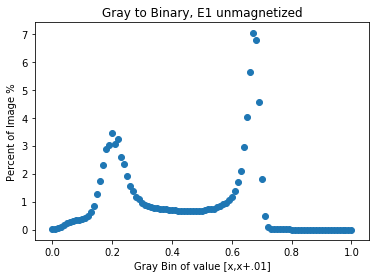

In [255]:
x = np.linspace(0,100, num = 101)
plt.scatter(x/100, Light_arr*100)
plt.title('Gray to Binary, E1 unmagnetized')
plt.xlabel('Gray Bin of value [x,x+.01]')
plt.ylabel('Percent of Image %')
plt.show()

## As shown above the bin range from .4 to 1 will give a light peak. 

# Converting RGB to Binary Image

The image we obtain were $1536 \times 2048$. The following goes through the steps in the funtion getm

In [7]:
fn = 'MD/E1/450F1/0.png'
background = 'MD/E1/450F1/450.png'

In [8]:
x = .4
start = 70
Dark, Light, m, img, img1,img2 = getm(fn,background,low = x, high = 1,i = start, z = 1400-start )
zerror = m # this is the error used in Fig. 5

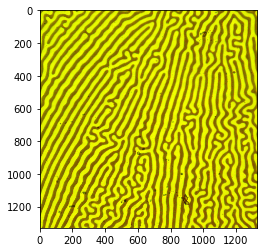

In [9]:
plt.imshow(img)
plt.show()

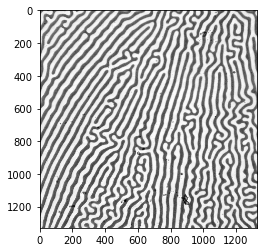

In [249]:
plt.imshow(img1)
plt.gray()
plt.show()

In [15]:
np.shape(img1)

(1330, 1330)

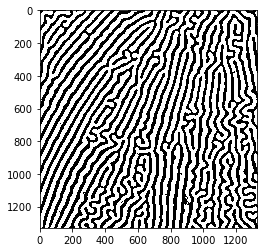

In [250]:
plt.imshow(img2)
plt.show()

## Getting the Hysterises

All of below is simply looping and obtaining magnetzation values for every image for the Hard test

In [213]:
x = .4
m_arr = []
I = []
start = 70
stop = 1400

background = 'MD/E1/450F1/450.png'

for y in range(10):
    Dark, Light, m, img, img1,img2 = getm('MD/E1/450F1/%d.png' %((y)*50), \
                                          background, low = x, high = 1, i = start, z = stop-start)
    m_arr.append(m)
    I.append(50*y)

for y in range(8):
    Dark, Light, m, img, img1,img2 = getm('MD/E1/450F1/%d.png' % (-450 + (y+1)*50), \
                                          background, low = x, high = 1,i = start, z = stop-start)
    m_arr.append(m)
    I.append(450 - 50*(y+1))

Dark, Light, m, img, img1,img2 = getm('MD/E1/450F1/-0.png', background, low = x, high = 1 ,i = start, z = stop-start)
I.append(0)
m_arr.append(m)

In [214]:
for y in range(10):
    Dark, Light, m, img, img1,img2 = getm('MD/E1/450R1/%d.png' %((y)*50),\
                                          background, low = x, high = 1, i = start, z = stop-start)
    m_arr.append(m)
    I.append(-50*y)

    
for y in range(8):
    Dark, Light, m, img, img1,img2 = getm('MD/E1/450R1/%d.png' % (-450 + (y+1)*50),\
                                          background, low = x, high = 1,i = start, z = stop-start)
    m_arr.append(m)
    I.append(-450 + 50*(y+1))

Dark, Light, m, img, img1,img2 = getm('MD/E1/450R1/-0.png', background, low = x, high = 1, i = start, z = stop-start)
I.append(0)
m_arr.append(m)

In [215]:
for y in range(10):
    Dark, Light, m, img, img1,img2 = getm('MD/E1/450F2/%d.png' %((y)*50), \
                                          background, low = x, high = 1, i = start, z = stop-start)
    m_arr.append(m)
    I.append(50*y)

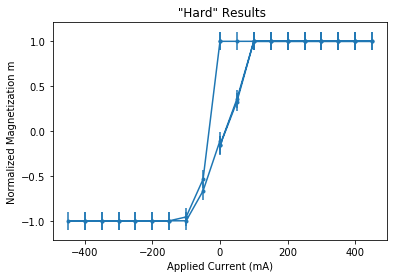

In [244]:
plt.scatter(I, m_arr, marker = '.')
plt.errorbar(I, m_arr, yerr = zerror,)

plt.title(' "Hard" Results')
plt.xlabel('Applied Current (mA)')
plt.ylabel('Normalized Magnetization m')
plt.savefig('E1Results.png')
plt.show()

### Getting error bars from artifacts

Below was a potential method for getting the uncertainty in the magnetization values but, they were really small and were smaller than the error from the initial demagntization. Since this will be the same for the Soft test this was not repeated in the second notebook.

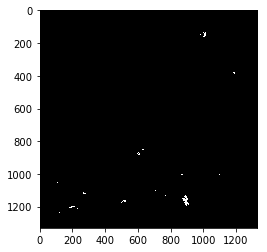

In [252]:
back = plt.imread('MD/E1/450F1/450.png')[start:stop,start:stop] # Reads background from fully saturated positive
back1 = plt.imread('MD/E1/450R1/450.png')[start:stop,start:stop] # Reads background from fully saturated negative

back = rgb2gray(back)
back1 = rgb2gray(back1)

atf = back1 - back #Subtracts the two

atf = (atf<.5) #Artifacts will show up lower on the grayscale everything else will be more postive

error = np.sum(atf) 
perror = error/(Dark+Light) # percent error is .018

plt.imshow(atf)
plt.show()

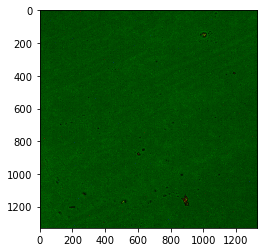

In [217]:
plt.imshow(img) #For comparison
plt.show()

$\textit{A little bit of Art:}$

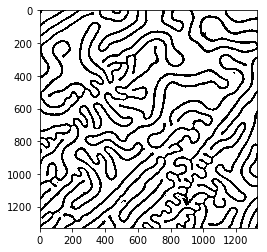

In [219]:
Dark, Light, m, img, img1,img2 = getm('MD/E1/450R1/50.png', background, low = x, high = 1, i = start, z = stop-start)

plt.imshow(img2)
plt.show()